In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_path = r"C:\Users\yoges\Downloads\Fake.csv.zip"  # Rename as needed

# Destination folder to extract
extract_folder = r"C:\Users\yoges\Downloads\fake_news_data"

# Create folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Extracted to:", extract_folder)


✅ Extracted to: C:\Users\yoges\Downloads\fake_news_data


In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_path = r"C:\Users\yoges\Downloads\True.csv.zip"  # Rename as needed

# Destination folder to extract
extract_folder = r"C:\Users\yoges\Downloads\True_news_data"

# Create folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Extracted to:", extract_folder)


✅ Extracted to: C:\Users\yoges\Downloads\True_news_data


In [ ]:
import pandas as pd

# Load extracted CSVs
fake_df = pd.read_csv(r"C:\Users\yoges\Downloads\fake_news_data\Fake.csv")
true_df = pd.read_csv(r"C:\Users\yoges\Downloads\fake_news_data\True.csv")

# Preview
print(fake_df.head())
print(true_df.head())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [ ]:
print(fake_df.head())
print(true_df.head())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1  
                                               title  \
0  As U.S. budget fight looms, Republicans

In [ ]:
print(df.shape)
print(df.head())


(44898, 5)
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0  



Label counts:
label
1    23481
0    21417
Name: count, dtype: int64


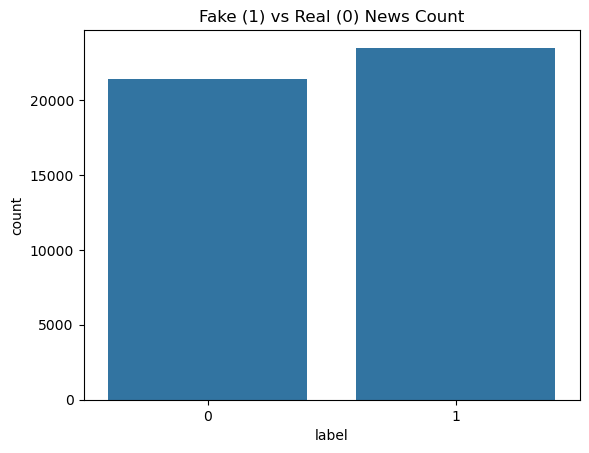


Missing values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [ ]:
# Class distribution
print("\nLabel counts:")
print(df['label'].value_counts())

# Plot (requires matplotlib & seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Fake (1) vs Real (0) News Count')
plt.show()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


In [ ]:
print("\nCombined DataFrame Shape:", df.shape)
print(df.head())

# If you only want to see fake or real
print("\nSample Fake News:\n", df[df['label'] == 1]['title'].head())
print("\nSample Real News:\n", df[df['label'] == 0]['title'].head())



Combined DataFrame Shape: (44898, 5)
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0  

Sample Fake

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk

# Set NLTK download folder manually (optional)
nltk.data.path.append(r"C:\Users\yoges\AppData\Roaming\nltk_data")

# Re-download key packages
nltk.download('punkt', download_dir=r"C:\Users\yoges\AppData\Roaming\nltk_data")
nltk.download('stopwords', download_dir=r"C:\Users\yoges\AppData\Roaming\nltk_data")
nltk.download('wordnet', download_dir=r"C:\Users\yoges\AppData\Roaming\nltk_data")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yoges\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')  # Should return a list, not error


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 2.4/376.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 3.1/376.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 3.7/376.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 4.2/376.0 MB 4.7 MB/s eta 0:01:20
    --------------------------------------- 5.0/376.0 MB 4.2 MB/s eta 0:01:29
    --------------------------------------- 6.3/376.0 MB 4.5 MB/s eta 0:01:23
    --------------------------------------- 7.9/376.0 MB 4.9 MB/s eta 0:01:16
   - -------------------------------------- 9.7/376.0 MB 5.3 MB/s eta 0:01:09
   - -------------------------------------- 11.5/376.0 MB 5.7 MB/s eta 0:01:05
   - -------------------------------------- 13.4/376.0 MB 6.0 MB/s eta 0:01:01
   - -------------------------------------- 14.2/376.0 MB 5.9 MB/s et

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
import pandas as pd

# Use raw string or forward slashes to avoid path errors
df = pd.read_csv(r"C:\Users\yoges\Downloads\True_news_data\True.csv")

# Or
# df = pd.read_csv("C:/Users/yoges/Downloads/True_news_data/True.csv")

print(df.head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [ ]:
print(df.columns)  # To see all column names
print(df['text'].head())  # Example to see the raw text data


Index(['title', 'text', 'subject', 'date'], dtype='object')
0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object


In [ ]:
import re

def clean_text(text):
    # Lowercase, remove special characters and digits
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)
print(df['clean_text'].head())


0    washington reuters  the head of a conservative...
1    washington reuters  transgender people will be...
2    washington reuters  the special counsel invest...
3    washington reuters  trump campaign adviser geo...
4    seattlewashington reuters  president donald tr...
Name: clean_text, dtype: object


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define vocab size and max sequence length
vocab_size = 5000
max_length = 200
oov_token = "<OOV>"

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df['clean_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['clean_text'])

# Pad sequences to the same length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

print(padded_sequences[:5])


[[ 377  429  131    1    2  277    4    2 3209   57  839 1850    3    2
   100   17  503   21    7  778  313    5  434    1 1431    8    2    1
   378   11 4908 3072   59 2643  280   41    1    2  949  678   23 2309
     6 2402  128   13  199 3687    2   36   19    9    7  298  388 2234
    14  500  523   11   24  552 1057  243  427    6   71  305  118  580
     7 1140   11 4136    3  220    2 3209  422    1    1   60 3671   70
   124   26  970    1   10  277    3   71  168    1  148   17  427  523
    43  264    3  143 2643 1745   70    9    8  113   21 1081   37  487
    13  396  193    3  754  164  319   10   37   27 1256   16    5 1261
     4  945  872   11   21    6   56  193    8  857    6    2   90   53
     9   21   15   54 1123    3  487    8  245   13  569   56  300 3012
  1907   32  500   50 1160  543    2   53   19  627   29  217  543 1608
    45    1    7  569  610    6  827 1130    6    1    7  743    2 1608
   337    1    2  217 1998   16    2   21  125    2   94   19   

In [ ]:
print(df.columns)


Index(['title', 'text', 'subject', 'date', 'clean_text'], dtype='object')


In [ ]:
df_subset = df[['title', 'text', 'subject', 'date', 'clean_text']]
print(df_subset.head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date                                         clean_text  
0  December 31, 2017   washington reuters  the head of a conservative...  
1  December 29, 2017   washington reuters  transgender people will be...  
2  December 31, 2

In [ ]:
import pandas as pd

fake_df = pd.read_csv("C:\\Users\\yoges\\Downloads\\fake_news_data\\Fake.csv")
true_df = pd.read_csv("C:\\Users\\yoges\\Downloads\\True_news_data\\True.csv")
print(fake_df.head())
print(true_df.head())



                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [ ]:
fake_df['label'] = 1
true_df['label'] = 0

df = pd.concat([fake_df, true_df])
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data
print(fake_df.head())
print(true_df.head())



                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1  
                                               title  \
0  As U.S. budget fight looms, Republicans

In [ ]:
import pandas as pd

fake_df = pd.read_csv("C:\\Users\\yoges\\Downloads\\fake_news_data\\Fake.csv")
true_df = pd.read_csv("C:\\Users\\yoges\\Downloads\\True_news_data\\True.csv")

# Add labels
fake_df['label'] = 1
true_df['label'] = 0

# Combine and shuffle
df = pd.concat([fake_df, true_df])
df = df.sample(frac=1).reset_index(drop=True)

print(df.columns)  # Check column names like 'text'


Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Optional: confirm it worked
print(df[['text', 'clean_text']].head())


                                                text  \
0  LIMA (Reuters) - Peruvian President Pedro Pabl...   
1  BERLIN (Reuters) - Germany s departing finance...   
2  Shawn Helton 21st Century WireThis week a Hous...   
3  EDINBURGH (Reuters) - An agreement to keep Nor...   
4  ISLAMABAD (Reuters) - Ties between the United ...   

                                          clean_text  
0  lima reuters  peruvian president pedro pablo k...  
1  berlin reuters  germany s departing finance mi...  
2  shawn helton st century wirethis week a house ...  
3  edinburgh reuters  an agreement to keep northe...  
4  islamabad reuters  ties between the united sta...  


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 5000
max_length = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

print("Tokenizer vocab size:", len(tokenizer.word_index))
print("First padded sequence:\n", padded_sequences[0])
print("Shape of padded sequences:", padded_sequences.shape)





Tokenizer vocab size: 214169
First padded sequence:
 [  44   23 4017 4834 4658   14    7    5 4018  296   28   31  580   16
  410    1 4658   10  880  250   19  891  423   12 2674  453    3    1
  443  229    1    1   30   22  932  728  124 3205    6   14   20  169
   18  104  368    3  503 1094    6    1    1  114   25  638  965    3
 1699   11  404    2    1   28    2 2664    4  891  423   46 3392   21
  475 1732    1   30  369   27  106 1216    1    1    1    6    1    1
    3   23  420    7    1 2127  113 1424 3707  639  730   27   12   31
    1    3    2  103  891  423  218  229 4485    1   86  354    7  827
    4   54    4    2  103   10 2664   19 1424  794 1026   32  173  741
   11  302    8   32  173   25  137    3  527  891  423   10  239    1
  142  249    1    1   12  143  266   11 1703 4305  269   11    1  119
   53   94   50   51   22  932  728    7  322  536  891  423  416   24
  950 4658   11    1    3    1 2839    7  195   52  410  123  280   13
  794   11    1   19    

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# X = tokenized and padded sequences
X = padded_sequences

# y = label column (already added earlier)
y = df['label'].values

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (35918, 200)
Test shape: (8980, 200)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 64

model = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim, input_length=200),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


C:\Users\yoges\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,               # You can increase to 10+ if needed
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 83s 137ms/step - accuracy: 0.8165 - loss: 0.3610 - val_accuracy: 0.9731 - val_loss: 0.0983
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 74s 132ms/step - accuracy: 0.9308 - loss: 0.1788 - val_accuracy: 0.8619 - val_loss: 0.2505
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 76s 135ms/step - accuracy: 0.9365 - loss: 0.1710 - val_accuracy: 0.9676 - val_loss: 0.1035
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 75s 134ms/step - accuracy: 0.9721 - loss: 0.0952 - val_accuracy: 0.9720 - val_loss: 0.0897
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 73s 130ms/step - accuracy: 0.9599 - loss: 0.1102 - val_accuracy: 0.9775 - val_loss: 0.0821


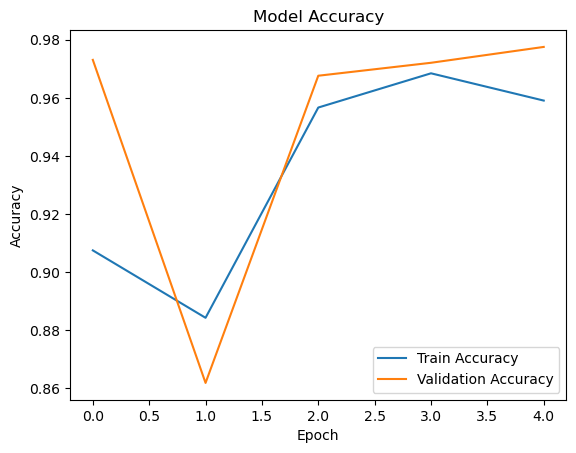

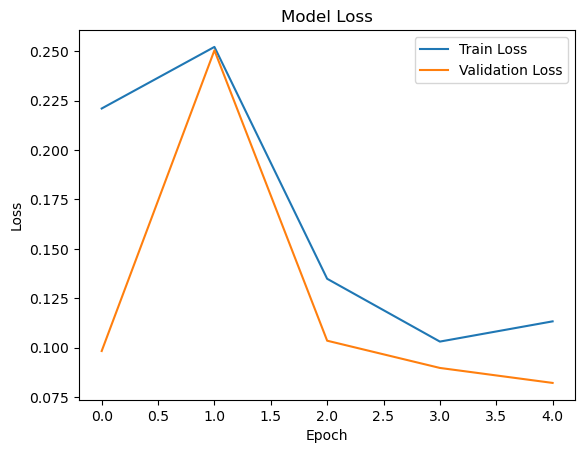

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
model.save("fake_news_model.h5")